In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
add_df = pd.read_csv('https://raw.githubusercontent.com/ammishra08/MachineLearning/master/Datasets/Admission.csv')

In [3]:
add_df

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
495,496,332,108,5,4.5,4.0,9.02,1,0.87
496,497,337,117,5,5.0,5.0,9.87,1,0.96
497,498,330,120,5,4.5,5.0,9.56,1,0.93
498,499,312,103,4,4.0,5.0,8.43,0,0.73


In [4]:
add_df.isnull().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

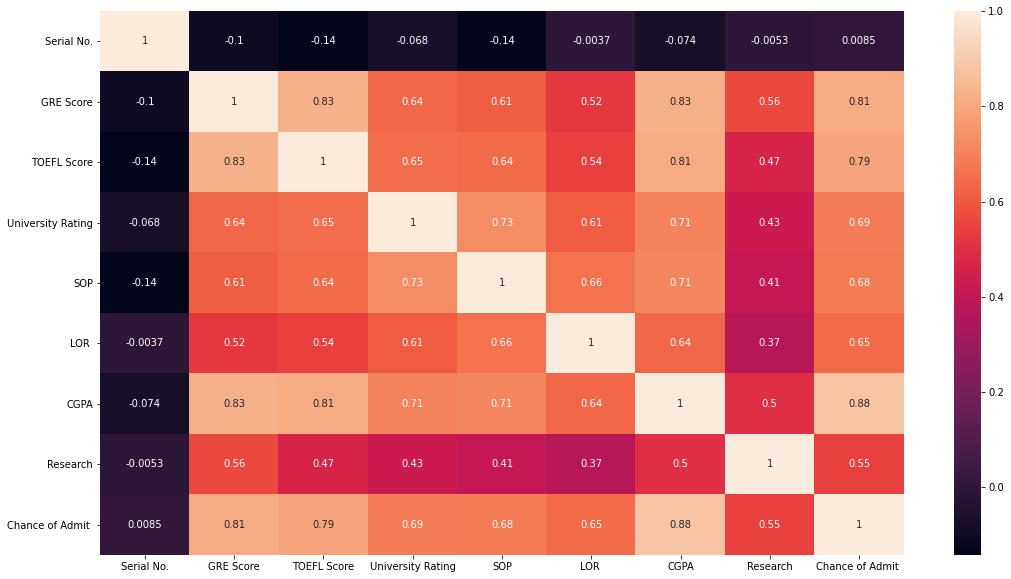

In [5]:
plt.figure(figsize = (18,10))
sns.heatmap(add_df.corr(), annot = True)

In [6]:
add_df.drop(['Serial No.'], axis = 1, inplace=True)

In [7]:
add_df

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...
495,332,108,5,4.5,4.0,9.02,1,0.87
496,337,117,5,5.0,5.0,9.87,1,0.96
497,330,120,5,4.5,5.0,9.56,1,0.93
498,312,103,4,4.0,5.0,8.43,0,0.73


In [8]:
add_df.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit '],
      dtype='object')

In [9]:
X = add_df.drop('Chance of Admit ', axis = 1)

In [10]:
Y = add_df['Chance of Admit ']

In [11]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

In [12]:
scaler.fit(X)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [13]:
scaler_X = scaler.transform(X)

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X_train, X_test, Y_train, Y_test = train_test_split(scaler_X, Y, test_size = 0.2, random_state = 9)

In [16]:
# Dense Layer in NN
from keras.layers import Dense
# Feed Foreward NN
from keras.models import Sequential
# Model Optimizers
from keras.optimizers import RMSprop

In [17]:
def build_model ():
  model = Sequential()
  # Input Layer : num of neurons = (2)^n
  model.add(Dense(units = 64, activation='relu', input_shape = [len(X.columns)]))
  # Hidden Layer - I
  model.add(Dense(units = 128, activation='relu'))
  # Hidden Layer - II
  model.add(Dense(units = 128, activation='relu'))
  # Output Layer
  model.add(Dense(units = 1))

  # Optimizers = RMSProp
  # Alpha = Learning Rate : sample size = small (0.0001), sample size = large (0.01)
  optimizers = RMSprop(learning_rate= 0.001)

  # For Regression : loss function - mean_squared_error
  model.compile(loss = 'mean_squared_error', optimizer = optimizers, metrics = ['mean_squared_error', 
                                                                                'mean_absolute_error'])
  return model 

In [18]:
model = build_model()

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                512       
_________________________________________________________________
dense_1 (Dense)              (None, 128)               8320      
_________________________________________________________________
dense_2 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 129       
Total params: 25,473
Trainable params: 25,473
Non-trainable params: 0
_________________________________________________________________


In [20]:
# epochs = Number of iterations
# batch_size = 20 : A small sample / batch sample taken for iterations in every epoch
# validation_split = 15% of overall data from training dataset for validation 
history = model.fit(X_train, Y_train, epochs = 600, batch_size = 20, validation_split=0.15)

Epoch 1/600
17/17 [==============================] - 0s 11ms/step - loss: 0.0836 - mean_squared_error: 0.0836 - mean_absolute_error: 0.1892 - val_loss: 0.0086 - val_mean_squared_error: 0.0086 - val_mean_absolute_error: 0.0733
Epoch 2/600
17/17 [==============================] - 0s 2ms/step - loss: 0.0094 - mean_squared_error: 0.0094 - mean_absolute_error: 0.0769 - val_loss: 0.0089 - val_mean_squared_error: 0.0089 - val_mean_absolute_error: 0.0736
Epoch 3/600
17/17 [==============================] - 0s 2ms/step - loss: 0.0085 - mean_squared_error: 0.0085 - mean_absolute_error: 0.0733 - val_loss: 0.0108 - val_mean_squared_error: 0.0108 - val_mean_absolute_error: 0.0799
Epoch 4/600
17/17 [==============================] - 0s 2ms/step - loss: 0.0079 - mean_squared_error: 0.0079 - mean_absolute_error: 0.0714 - val_loss: 0.0100 - val_mean_squared_error: 0.0100 - val_mean_absolute_error: 0.0762
Epoch 5/600
17/17 [==============================] - 0s 2ms/step - loss: 0.0075 - mean_squared_erro

In [21]:
pd.DataFrame(history.history)

,loss,mean_squared_error,mean_absolute_error,val_loss,val_mean_squared_error,val_mean_absolute_error
0,0.083582,0.083582,0.189190,0.008585,0.008585,0.073332
1,0.009355,0.009355,0.076931,0.008892,0.008892,0.073580
2,0.008495,0.008495,0.073315,0.010757,0.010757,0.079912
3,0.007857,0.007857,0.071426,0.009998,0.009998,0.076158
4,0.007454,0.007454,0.069308,0.004765,0.004765,0.049820
...,...,...,...,...,...,...
595,0.000524,0.000524,0.017954,0.005166,0.005166,0.046992
596,0.000376,0.000376,0.015068,0.005673,0.005673,0.050913
597,0.000507,0.000507,0.016429,0.005301,0.005301,0.049135
598,0.000409,0.000409,0.015327,0.005613,0.005613,0.052494


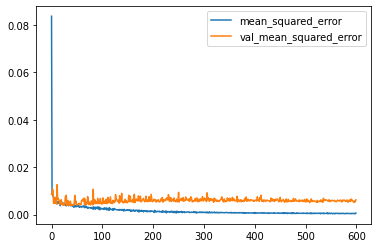

In [22]:
pd.DataFrame(history.history)[['mean_squared_error','val_mean_squared_error']].plot()

In [23]:
prediction = model.predict(X_test)

In [24]:
# r2 (r-squared) - measure of detemination in regression
from sklearn.metrics import r2_score
r2_score(Y_test, prediction) 

0.7114077954615856

In [25]:
X_new = [[324, 107, 4, 4.0, 4.5, 8.87, 1]]

In [26]:
scaler_X_New = scaler.transform(X_new)

In [27]:
model.predict(scaler_X_New)

array([[0.79300755]], dtype=float32)

In [28]:
add_df

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...
495,332,108,5,4.5,4.0,9.02,1,0.87
496,337,117,5,5.0,5.0,9.87,1,0.96
497,330,120,5,4.5,5.0,9.56,1,0.93
498,312,103,4,4.0,5.0,8.43,0,0.73
